In [4]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd 
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/daily-total-female-births.csv')
df.head()


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


# AR MODEL

In [6]:
Y = df.Births.values
train, test = Y[:len(Y)-7], Y[len(Y)-7:]

In [7]:
AR_model = AutoReg(train, lags=2)
AR_results = AR_model.fit()

In [8]:
Y_hat = AR_results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [9]:
for y_hat, y_true in zip(Y_hat, test):
    print(f'Predicted={y_hat} \tExpected={y_true}')

Predicted=41.00998299621138 	Expected=44
Predicted=41.339570786034756 	Expected=34
Predicted=41.7410490879718 	Expected=37
Predicted=41.85249305081904 	Expected=52
Predicted=41.91850636281706 	Expected=48
Predicted=41.94330911921788 	Expected=55
Predicted=41.95535989900882 	Expected=50


In [10]:
np.sqrt(mean_squared_error(test, Y_hat))

8.110283777968606

In [11]:
AR_results.params

array([29.46548462,  0.18468755,  0.11315929])

In [12]:
AR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                     AutoReg(2)   Log Likelihood               -1203.234
Method:               Conditional MLE   S.D. of innovations              7.106
Date:                Sun, 31 Dec 2023   AIC                           2414.467
Time:                        02:11:41   BIC                           2429.967
Sample:                             2   HQIC                          2420.633
                                  358                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4655      2.792     10.554      0.000      23.993      34.938
y.L1           0.1847      0.053      3.513      0.000       0.082       0.288
y.L2           0.1132      0.053      2.155      0.031       0.010       0.216
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2666           +0.0000j            2.2666            0.0000
AR.2           -3.8988           +0.0000j            3.8988            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
train

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [14]:
test

array([44, 34, 37, 52, 48, 55, 50], dtype=int64)

In [15]:
Y_hat

array([41.009983  , 41.33957079, 41.74104909, 41.85249305, 41.91850636,
       41.94330912, 41.9553599 ])

In [16]:
29.46548462 + 0.18468755*38+0.11315929*40

41.00998312

In [17]:
29.46548462 + 0.18468755*41.00998312+0.11315929*38

41.33957094797416

In [18]:
Y_hat_sim = list(train[-2:])
c = 29.46548462
phi_1 = 0.18468755
phi_2 = 0.11315929
for i in range(7):
    predict = c + phi_1*Y_hat_sim[-1] + phi_2*Y_hat_sim[-2]
    Y_hat_sim.append(predict)

In [19]:
for a, b in zip(Y_hat_sim[2:], Y_hat):
    print(f"Simulated={a} \t Predicted={b}")

Simulated=41.00998312 	 Predicted=41.00998299621138
Simulated=41.33957094797416 	 Predicted=41.339570786034756
Simulated=41.74104926920371 	 Predicted=41.7410490879718
Simulated=41.85249324133591 	 Predicted=41.85249305081904
Simulated=41.918506557292 	 Predicted=41.91850636281706
Simulated=41.94330931564456 	 Predicted=41.94330911921788
Simulated=41.95536009628208 	 Predicted=41.95535989900882


In [20]:
Y_hat_sim[2:], Y_hat

([41.00998312,
  41.33957094797416,
  41.74104926920371,
  41.85249324133591,
  41.918506557292,
  41.94330931564456,
  41.95536009628208],
 array([41.009983  , 41.33957079, 41.74104909, 41.85249305, 41.91850636,
        41.94330912, 41.9553599 ]))

Text(0.5, 1.0, 'AR(2)')

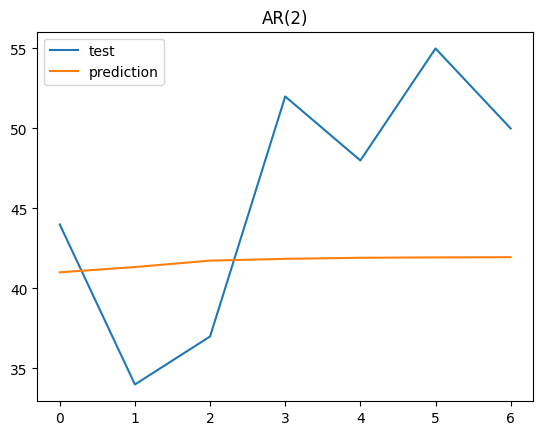

In [21]:
sns.lineplot(test, label='test')
sns.lineplot(Y_hat, label='prediction')
plt.title("AR(2)")

### Moving Average Model

In [22]:
np.random.seed(42)

In [23]:
samples = np.random.normal(0, 1, size=100)


In [24]:
samples[-1]

-0.23458713337514692

In [25]:
MA1 = np.zeros(len(samples))
MA1[0] = 20 + samples[0]
for i in range(1, len(MA1)):
    MA1[i] = 20 + samples[i] + 0.8*samples[i-1]

In [26]:
MA2 = np.zeros(len(samples))
MA2[0] = samples[0]
MA2[1] = samples[1] - samples[0]
for i in range(2, len(MA2)):
    MA2[i] = samples[i] - samples[i-1] + 0.8*samples[i-2]

Text(0.5, 1.0, 'MA(1)')

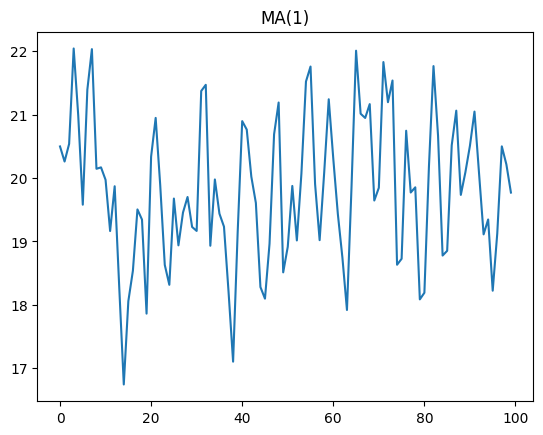

In [27]:

sns.lineplot(MA1)
plt.title("MA(1)")

Text(0.5, 1.0, 'MA(2)')

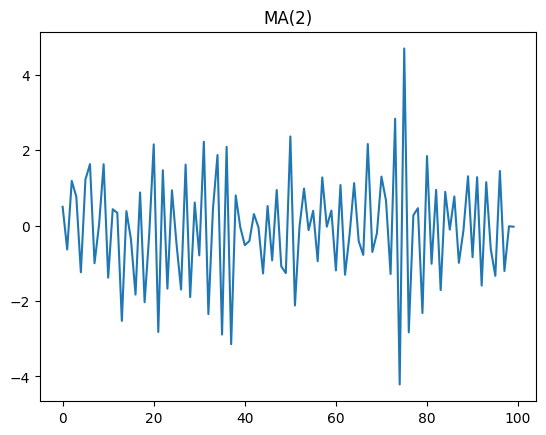

In [28]:
sns.lineplot(MA2)
plt.title("MA(2)")

In [29]:
from statsmodels.tsa.arima.model import ARIMA


In [42]:
np.random.seed(20)
for i in range(1, 10):
    MA_model = ARIMA(train, order=(0, 0, i))
    MA_results = MA_model.fit()
    print(MA_results.params[0])


41.90336456961751
41.89874024582331
41.891501684411935
41.887831555250614
41.88590709759107
41.88528852649531
41.8640551538677
41.849053138294344
41.8452634667668


In [43]:
MA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                 ARIMA(0, 0, 9)   Log Likelihood               -1202.441
Date:                Sun, 31 Dec 2023   AIC                           2426.882
Time:                        02:16:05   BIC                           2469.568
Sample:                             0   HQIC                          2443.859
                                - 358                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8453      0.732     57.196      0.000      40.411      43.279
ma.L1          0.1516      0.057      2.670      0.008       0.040       0.263
ma.L2          0.0989      0.054      1.822      0.068      -0.007       0.205
ma.L3          0.0515      0.058      0.894      0.371      -0.061       0.164
ma.L4          0.0539      0.059      0.920      0.358      -0.061       0.169
ma.L5          0.0859      0.057      1.515      0.130      -0.025       0.197
ma.L6          0.0717      0.060      1.189      0.234      -0.047       0.190
ma.L7          0.1879      0.050      3.761      0.000       0.090       0.286
ma.L8          0.1255      0.059      2.141      0.032       0.011       0.240
ma.L9          0.0346      0.055      0.632      0.527      -0.073       0.142
sigma2        48.3559      3.824     12.645      0.000      40.861      55.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.49
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:

Y_hat = MA_results.forecast(7)
for y_hat, y_true in zip(Y_hat, test):
    print(f'Predicted={y_hat} \tExpected={y_true}')

Predicted=41.25894485489726 	Expected=44
Predicted=41.90336456961751 	Expected=34
Predicted=41.90336456961751 	Expected=37
Predicted=41.90336456961751 	Expected=52
Predicted=41.90336456961751 	Expected=48
Predicted=41.90336456961751 	Expected=55
Predicted=41.90336456961751 	Expected=50


In [55]:
print('RMSE:', np.sqrt(mean_squared_error(test, Y_hat)))

RMSE: 8.195886724495098


<Axes: >

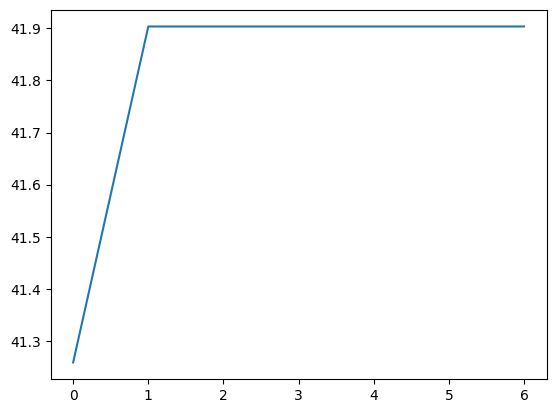

In [56]:
sns.lineplot(Y_hat)


Text(0.5, 1.0, 'MA(2)')

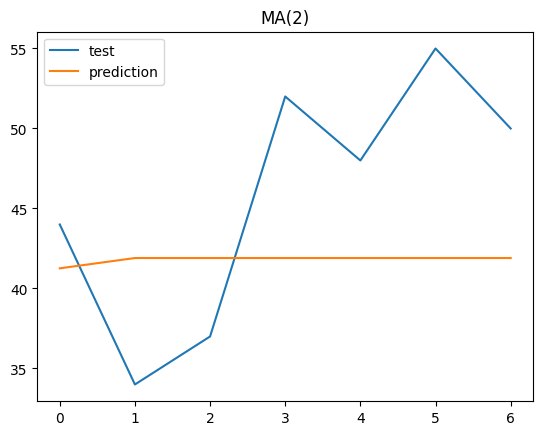

In [57]:
sns.lineplot(test, label='test')
sns.lineplot(Y_hat, label='prediction')
plt.title("MA(2)")

In [58]:
train.mean()

41.90782122905028

In [60]:
MA_results.params

array([41.90336457,  0.17330466, 51.65745841])

In [37]:
41.11548398943469 + 0.17900771*-2.94012608 + 0.11330768*-2.26772814

40.332227738328505

In [62]:
train.sum() / (len(train)-1)

42.02521008403362

In [46]:
MA_results.resid

array([-6.89874025e+00, -8.58294191e+00, -9.63603196e+00, -8.20730677e+00,
        4.66081766e+00, -1.28031243e+01,  4.86502357e+00,  1.68107497e+00,
       -4.75091010e+00, -1.42387694e+01, -8.11576072e-01, -7.14009987e+00,
        1.44713505e+01,  3.31980458e+00,  8.67273904e-01, -5.43014834e+00,
        8.97502939e+00,  1.09937804e-01, -1.93535976e+00,  1.04352473e+01,
       -9.54743886e+00,  1.16279312e+01, -3.89843143e+00, -1.05184249e+01,
       -2.57413881e+00,  2.75386883e+00, -3.10003430e+00, -6.65584470e+00,
        3.64396500e+00, -3.79687973e+00, -1.76319587e+01, -1.53122680e+01,
       -6.15988975e+00,  4.93892517e+00, -4.08488310e+00,  8.27286716e+00,
       -4.91679863e+00,  9.04402521e+00, -1.19605794e+01, -9.78246183e+00,
        1.22076214e+01, -6.97557054e+00,  2.96672336e+00,  9.36057914e+00,
       -9.91050867e+00,  1.08146917e+01,  4.28828332e+00,  1.10823628e+00,
        3.41698146e+00, -3.63597797e+00,  6.36495760e+00, -5.62613250e+00,
       -6.61281774e+00,  

In [39]:
c = 41.89874024
theta_1 = 0.17900771
theta_2 = 0.11330768
resid_t = -2.94012608
resid_t_previous_1 = -2.2677281

In [275]:
c + theta_1*resid_t + theta_2*resid_t_previous_1

41.11548399342612

In [277]:
resid_t_previous_1 = resid_t
resid_t = 0
c + theta_1*resid_t + theta_2*resid_t_previous_1

41.565601374967706

In [224]:
41.56560136 -41.11548398943469

0.45011737056530876

In [229]:
(41.56560136 - c - theta_2*(-2.94012608))/theta_1

-8.36148650773368e-08

In [226]:
MA_results.resid[-2:]

array([-2.26772814, -2.94012608])

In [230]:
-8.36148650773368e-08*theta_1 + -2.94012608*theta_2 + c

41.56560136

In [233]:
-8.36148650773368e-08+c

41.89874015638514

In [234]:
41.11548398943469-c

-0.7832562505653087

In [235]:
c

41.89874024

In [237]:
Y_hat - c

array([-7.83256271e-01, -3.33138879e-01,  2.03549178e-10,  2.03549178e-10,
        2.03549178e-10,  2.03549178e-10,  2.03549178e-10])

In [255]:
MA_results.forecast(7)

array([41.11548397, 41.56560136, 41.89874024, 41.89874024, 41.89874024,
       41.89874024, 41.89874024])

In [259]:
MA_results.resid[-1]*theta_2 + c 

41.56560137535659